In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('cardio_dataset.csv')

In [3]:
print(df)

      SEX  AGEIR   TC  HDL  SMOKE_  BPMED  DIAB_01  RISK
0       2     48  236   66       0      2        0   1.1
1       1     48  260   51       0      2        1   7.0
2       1     44  187   49       1      2        0   7.0
3       2     42  216   57       1      2        0   0.4
4       2     56  156   42       0      2        0   2.2
...   ...    ...  ...  ...     ...    ...      ...   ...
6639    2     65  307   42       1      1        1  36.6
6640    2     42  169   56       0      1        0   0.8
6641    1     65  212   35       1      1        0  30.6
6642    1     66  184   39       0      1        0  23.8
6643    2     45  203   51       0      2        0   1.0

[6644 rows x 8 columns]


In [5]:
dataset = df.values
print(dataset)

[[  2.   48.  236.  ...   2.    0.    1.1]
 [  1.   48.  260.  ...   2.    1.    7. ]
 [  1.   44.  187.  ...   2.    0.    7. ]
 ...
 [  1.   65.  212.  ...   1.    0.   30.6]
 [  1.   66.  184.  ...   1.    0.   23.8]
 [  2.   45.  203.  ...   2.    0.    1. ]]


In [6]:
data = dataset[:,0:7]
target = dataset[:,7]

In [7]:
print(data)

[[  2.  48. 236. ...   0.   2.   0.]
 [  1.  48. 260. ...   0.   2.   1.]
 [  1.  44. 187. ...   1.   2.   0.]
 ...
 [  1.  65. 212. ...   1.   1.   0.]
 [  1.  66. 184. ...   0.   1.   0.]
 [  2.  45. 203. ...   0.   2.   0.]]


In [8]:
print(target)

[ 1.1  7.   7.  ... 30.6 23.8  1. ]


In [9]:
from sklearn.preprocessing import MinMaxScaler

target = np.reshape(target, (-1,1)) # convet 2d array

In [10]:
print(target)

[[ 1.1]
 [ 7. ]
 [ 7. ]
 ...
 [30.6]
 [23.8]
 [ 1. ]]


In [14]:
scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

# scaler_target = MinMaxScaler(feature_range=(0,10)) #we can give any range

scaler_data.fit(data)
scaler_target.fit(target)

# data_scaled = scaler_data.fit_transform(data)

data_scaled = scaler_data.transform(data)
target_scaled = scaler_target.transform(target)

In [15]:
print(data_scaled)

[[1.         0.20512821 0.40045249 ... 0.         1.         0.        ]
 [0.         0.20512821 0.45475113 ... 0.         1.         1.        ]
 [0.         0.1025641  0.28959276 ... 1.         1.         0.        ]
 ...
 [0.         0.64102564 0.34615385 ... 1.         0.         0.        ]
 [0.         0.66666667 0.28280543 ... 0.         0.         0.        ]
 [1.         0.12820513 0.32579186 ... 0.         1.         0.        ]]


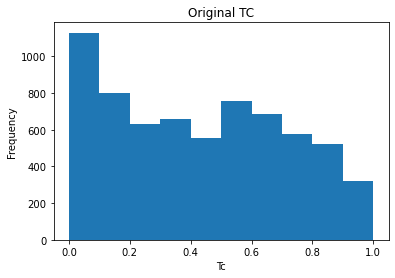

In [18]:
plt.hist(data_scaled[:,1],bins=10)
plt.title('Original TC')
plt.xlabel('Tc')
plt.ylabel('Frequency')
plt.show()

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled, test_size=0.2)

# FFNN Architecture

In [22]:
import keras.models as models
import keras.layers as layers
from keras.layers import Dropout
import numpy as np

model = models.Sequential()
model.add(layers.Dense(128, input_dim=7, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [23]:
# history = model.fit(train_data, train_target, epochs=200, validation_data=(test_data, test_target))

history = model.fit(data_scaled, target_scaled, epochs=200, validation_split=0.2)

Epoch 1/200
167/167 [==============================] - 1s 2ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0518 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0354
Epoch 2/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0368 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0391
Epoch 3/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0357 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0385
Epoch 4/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0361 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0393
Epoch 5/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0353 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0327
Epoch 6/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0348 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0338
Epoch 7/20

167/167 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0336 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0315
Epoch 51/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0317 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0328
Epoch 52/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0319 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0333
Epoch 53/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0319 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0327
Epoch 54/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0320 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0316
Epoch 55/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0314 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0318
Epoch 56/200
167/

167/167 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0307 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0326
Epoch 100/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0310 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0324
Epoch 101/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0301 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0329
Epoch 102/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0307 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0318
Epoch 103/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0303 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0319
Epoch 104/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0303 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0328
Epoch 105/20

167/167 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0294 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0334
Epoch 149/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0295 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0326
Epoch 150/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0297 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0324
Epoch 151/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0293 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0354
Epoch 152/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0295 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0356
Epoch 153/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0295 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0340
Epoch 154/20

167/167 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0286 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0329
Epoch 198/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0285 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0327
Epoch 199/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0285 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0342
Epoch 200/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0290 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0369


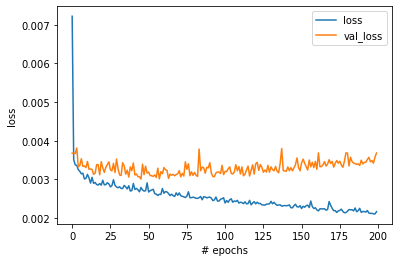

In [24]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()